In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\Uni work\Engineering Mathematics Work\MDM3\Sky broadband\2019-ISP-Broadband-performance-data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3465 non-null   int64  
 1   ISP                                3465 non-null   object 
 2   Technology                         3465 non-null   object 
 3   PACKAGE (download by upload)       3465 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   MarketClass                        3465 non-null   object 
 6   Region                             3465 non-null   object 
 7   Country                            3465 non-null   object 
 8   Geography                          3465 non-null   object 
 9   Download - 24 (ave)                3465 non-null   float64
 10  Download - 24 min(ave)             3465 non-null   float64
 11  Download - 24 max (ave)            3465 non-null   float

In [2]:
modDf= df.dropna(subset=["Web loading - 24h","NetflixUHD24hr"])

In [3]:
modDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 78 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3054 non-null   int64  
 1   ISP                                3054 non-null   object 
 2   Technology                         3054 non-null   object 
 3   PACKAGE (download by upload)       3054 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   MarketClass                        3054 non-null   object 
 6   Region                             3054 non-null   object 
 7   Country                            3054 non-null   object 
 8   Geography                          3054 non-null   object 
 9   Download - 24 (ave)                3054 non-null   float64
 10  Download - 24 min(ave)             3054 non-null   float64
 11  Download - 24 max (ave)            3054 non-null   float

In [4]:

modDf2= modDf.dropna(subset=["Web loading - 24h","NetflixUHD24hr"])
modDf2.drop(["MarketClass","rural_weight","Natweight"], axis=1, inplace=True)

modDf2.head(200)

,unit_id,ISP,Technology,PACKAGE (download by upload),Distance from exchange - DSL only,Region,Country,Geography,Download - 24 (ave),Download - 24 min(ave),...,iPlayerHD24hr,iPlayerSD24hr,iPlayerFailed24hr,iPlayerStartupDelay24hr,iPlayerUHDPeak,iPlayerHDPeak,iPlayerSDPeak,iPlayerFailedPeak,iPlayerStartupDelayPeak,isp_wghts
0,941318,Virgin,Cable,100,NaN,Scotland,Scotland,Urban,110.24,100.78,...,100.00%,0.00%,0.00%,802.71,0.00%,100.00%,0.00%,0.00%,771.44,1.000000
1,1323,Plusnet,FTTC,76,NaN,London,England,Urban,65.53,62.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880000
2,22074685,KCOM,FTTP,30,NaN,Yorkshire & Humberside,England,Urban,30.36,28.05,...,100.00%,0.00%,0.00%,1079.39,NaN,NaN,NaN,NaN,NaN,1.000000
3,1360,Sky,ADSL2,11,2251 to 2500m,North West,England,Rural,5.91,4.17,...,92.48%,7.52%,0.00%,3082.76,0.00%,91.67%,8.33%,0.00%,3320.73,1.633333
4,813667,Plusnet,ADSL1,8,2001 to 2250m,South East,England,Rural,1.52,1.20,...,0.00%,100.00%,0.00%,3553.32,0.00%,0.00%,100.00%,0.00%,3665.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,15147,TalkTalk,FTTC,38,NaN,Scotland,Scotland,Urban,37.13,34.02,...,100.00%,0.00%,0.00%,899.60,0.00%,100.00%,0.00%,0.00%,993.55,0.950000
201,14248,Plusnet,FTTC,76,NaN,North West,England,Urban,60.91,38.52,...,100.00%,0.00%,0.00%,926.44,0.00%,100.00%,0.00%,0.00%,967.30,0.880000
202,5220561,Plusnet,ADSL2,17,601 to 700m,North East,England,Urban,10.58,8.70,...,98.81%,1.19%,0.00%,2043.84,NaN,NaN,NaN,NaN,NaN,0.675000
203,14288,KCOM,FTTC,75,NaN,Yorkshire & Humberside,England,Urban,40.16,35.60,...,100.00%,0.00%,0.00%,742.96,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
modDf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unit_id                            3054 non-null   int64  
 1   ISP                                3054 non-null   object 
 2   Technology                         3054 non-null   object 
 3   PACKAGE (download by upload)       3054 non-null   int64  
 4   Distance from exchange - DSL only  338 non-null    object 
 5   Region                             3054 non-null   object 
 6   Country                            3054 non-null   object 
 7   Geography                          3054 non-null   object 
 8   Download - 24 (ave)                3054 non-null   float64
 9   Download - 24 min(ave)             3054 non-null   float64
 10  Download - 24 max (ave)            3054 non-null   float64
 11  Download - peak (ave)              3054 non-null   float

In [6]:
modDf2["Distance from exchange - DSL only"].fillna(value = "not DSL",inplace= True)
numerical_modDf= modDf2.loc[:,"Download - 24 (ave)":]
cat_modDf=modDf2.loc[:,:"Geography"]

print(cat_modDf)

       unit_id      ISP Technology  PACKAGE (download by upload)  \
0       941318   Virgin      Cable                           100   
1         1323  Plusnet       FTTC                            76   
2     22074685     KCOM       FTTP                            30   
3         1360      Sky      ADSL2                            11   
4       813667  Plusnet      ADSL1                             8   
...        ...      ...        ...                           ...   
3333   5072065     KCOM       FTTP                            75   
3426   5071997     KCOM       FTTP                            30   
3440   5072121     KCOM       FTTC                            75   
3441   5072181     KCOM       FTTC                            75   
3446   5220505     KCOM      ADSL2                            20   

     Distance from exchange - DSL only                  Region   Country  \
0                              not DSL                Scotland  Scotland   
1                              

In [7]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy= "mean")


In [8]:

numerical_modDf["DNS Failure 24hr"] = numerical_modDf["DNS Failure 24hr"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["DNS Failure peak"] = numerical_modDf["DNS Failure peak"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["Packet Loss - 24h"] = numerical_modDf["Packet Loss - 24h"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["Packet Loss - peak"] = numerical_modDf["Packet Loss - peak"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeUHD24hr"] = numerical_modDf["YouTubeUHD24hr"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["YouTubeHD24hr"] = numerical_modDf["YouTubeHD24hr"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeSD24hr"] = numerical_modDf["YouTubeSD24hr"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["YouTubeHDPeak"] = numerical_modDf["YouTubeHDPeak"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeSDPeak"] = numerical_modDf["YouTubeSDPeak"].str.rstrip('%').astype('float') / 100.0
numerical_modDf["YouTubeFailed24hr"] = numerical_modDf["YouTubeFailed24hr"].str.rstrip('%').astype('float')/ 100.0
numerical_modDf["YouTubeUHDPeak"]=   numerical_modDf["YouTubeUHDPeak"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["YouTubeFailedPeak"]=   numerical_modDf["YouTubeFailedPeak"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixUHD24hr"]=   numerical_modDf["NetflixUHD24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixHD24hr"]=   numerical_modDf["NetflixHD24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixSD24hr"]=   numerical_modDf["NetflixSD24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixFailed24hr"]=   numerical_modDf["NetflixFailed24hr"].str.rstrip('%').astype('float')/ 100 
numerical_modDf["NetflixUHDPeak"]=   numerical_modDf["NetflixUHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["NetflixHDPeak"]=   numerical_modDf["NetflixHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["NetflixSDPeak"]=   numerical_modDf["NetflixSDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["NetflixFailedPeak"]=   numerical_modDf["NetflixFailedPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerUHD24hr"]=   numerical_modDf["iPlayerUHD24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerHD24hr"]=   numerical_modDf["iPlayerHD24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerSD24hr"]=   numerical_modDf["iPlayerSD24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerFailed24hr"]=   numerical_modDf["iPlayerFailed24hr"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerUHDPeak"]=   numerical_modDf["iPlayerUHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerHDPeak"]=   numerical_modDf["iPlayerHDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerSDPeak"]=   numerical_modDf["iPlayerSDPeak"].str.rstrip('%').astype('float')/ 100
numerical_modDf["iPlayerFailedPeak"]=   numerical_modDf["iPlayerFailedPeak"].str.rstrip('%').astype('float')/ 100


# etflixSDPeak               2738 non-null   object 
#  54  NetflixFailedPeak           2738 non-null   object 
#  55  NetflixStartupDelayPeak     2738 non-null   float64
#  56  iPlayerUHD24hr              2951 non-null   object 
#  57  iPlayerHD24hr               2951 non-null   object 
#  58  iPlayerSD24hr               2951 non-null   object 
#  59  iPlayerFailed24hr           2951 non-null   object 
#  60  iPlayerStartupDelay24hr     2949 non-null   float64
#  61  iPlayerUHDPeak              2646 non-null   object 
#  62  iPlayerHDPeak               2646 non-null   object 
#  63  iPlayerSDPeak               2646 non-null   object 
#  64  iPlayerFailedPeak           2646 non-null   object 
# print(numerical_modDf["YouTubeFailed24hr"].head(20))

In [9]:
 numerical_modDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3446
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Download - 24 (ave)         3054 non-null   float64
 1   Download - 24 min(ave)      3054 non-null   float64
 2   Download - 24 max (ave)     3054 non-null   float64
 3   Download - peak (ave)       3054 non-null   float64
 4   Download - peak min(ave)    3054 non-null   float64
 5   Download - peak max (ave)   3054 non-null   float64
 6   Download - 0-6am            3043 non-null   float64
 7   Download - 6am-12am         3051 non-null   float64
 8   Download - 12-18pm          3053 non-null   float64
 9   Download - 18-19pm          3030 non-null   float64
 10  Download - 19-20pm          3054 non-null   float64
 11  Download - 20-21pm          3052 non-null   float64
 12  Download - 21-22pm          3054 non-null   float64
 13  Download - 22-23pm          3052 

In [10]:
imputer.fit(numerical_modDf)

SimpleImputer()

In [11]:
imputer.statistics_

array([7.83954388e+01, 6.80154715e+01, 8.15928978e+01, 7.71069319e+01,
       7.42584840e+01, 7.93528749e+01, 7.90403122e+01, 7.89402524e+01,
       7.84411562e+01, 7.79482211e+01, 7.77662443e+01, 7.72026704e+01,
       7.73582155e+01, 7.78660452e+01, 7.84568664e+01, 1.50618664e+01,
       1.43937852e+01, 1.52654977e+01, 1.49677963e+01, 1.48212475e+01,
       1.50895776e+01, 1.09905043e-03, 1.28077931e-03, 1.65395743e+01,
       1.71581794e+01, 7.69800197e-01, 9.61870292e-01, 3.74772355e-01,
       5.60379954e-01, 1.53020203e+01, 1.59462868e+01, 1.28176162e-03,
       1.23804846e-03, 3.23464475e+02, 3.46927704e+02, 4.46039961e-01,
       9.78551069e-03, 9.33423108e-01, 5.67934510e-02, 0.00000000e+00,
       9.17555175e+02, 6.45210148e-05, 9.44834229e-01, 5.51017418e-02,
       0.00000000e+00, 8.92941268e+02, 8.74637656e-01, 1.08360118e-01,
       1.62661428e-02, 7.35789129e-04, 1.00952421e+03, 8.74552374e-01,
       1.10430058e-01, 1.41910153e-02, 8.26186998e-04, 1.08135131e+03,
      

In [12]:
numerical_modDf.mean().values

array([7.83954388e+01, 6.80154715e+01, 8.15928978e+01, 7.71069319e+01,
       7.42584840e+01, 7.93528749e+01, 7.90403122e+01, 7.89402524e+01,
       7.84411562e+01, 7.79482211e+01, 7.77662443e+01, 7.72026704e+01,
       7.73582155e+01, 7.78660452e+01, 7.84568664e+01, 1.50618664e+01,
       1.43937852e+01, 1.52654977e+01, 1.49677963e+01, 1.48212475e+01,
       1.50895776e+01, 1.09905043e-03, 1.28077931e-03, 1.65395743e+01,
       1.71581794e+01, 7.69800197e-01, 9.61870292e-01, 3.74772355e-01,
       5.60379954e-01, 1.53020203e+01, 1.59462868e+01, 1.28176162e-03,
       1.23804846e-03, 3.23464475e+02, 3.46927704e+02, 4.46039961e-01,
       9.78551069e-03, 9.33423108e-01, 5.67934510e-02, 0.00000000e+00,
       9.17555175e+02, 6.45210148e-05, 9.44834229e-01, 5.51017418e-02,
       0.00000000e+00, 8.92941268e+02, 8.74637656e-01, 1.08360118e-01,
       1.62661428e-02, 7.35789129e-04, 1.00952421e+03, 8.74552374e-01,
       1.10430058e-01, 1.41910153e-02, 8.26186998e-04, 1.08135131e+03,
      

In [13]:
imputedDf= imputer.transform(numerical_modDf)

In [14]:
imputedDf= pd.DataFrame(imputedDf, columns=numerical_modDf.columns, index=numerical_modDf.index )

In [15]:
print(imputedDf)


      Download - 24 (ave)  Download - 24 min(ave)  Download - 24 max (ave)  \
0                  110.24                  100.78                   108.80   
1                   65.53                   62.78                    66.19   
2                   30.36                   28.05                    31.45   
3                    5.91                    4.17                     6.08   
4                    1.52                    1.20                     1.61   
...                   ...                     ...                      ...   
3333                79.03                   78.31                    79.15   
3426                31.38                   30.57                    31.47   
3440                70.33                   69.68                    70.42   
3441                74.10                   72.49                    74.51   
3446                 7.74                    7.37                     7.80   

      Download - peak (ave)  Download - peak min(ave)  \
0     

In [16]:

cat_modDf= cat_modDf.loc[:,"ISP":]
print(cat_modDf)

          ISP Technology  PACKAGE (download by upload)  \
0      Virgin      Cable                           100   
1     Plusnet       FTTC                            76   
2        KCOM       FTTP                            30   
3         Sky      ADSL2                            11   
4     Plusnet      ADSL1                             8   
...       ...        ...                           ...   
3333     KCOM       FTTP                            75   
3426     KCOM       FTTP                            30   
3440     KCOM       FTTC                            75   
3441     KCOM       FTTC                            75   
3446     KCOM      ADSL2                            20   

     Distance from exchange - DSL only                  Region   Country  \
0                              not DSL                Scotland  Scotland   
1                              not DSL                  London   England   
2                              not DSL  Yorkshire & Humberside   England   

In [17]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot_encoded= cat_encoder.fit_transform(cat_modDf)
cat_1hot_encoded= cat_1hot_encoded.toarray()
columns= cat_modDf.columns
# print(columns)
feature_names= cat_encoder.get_feature_names(columns)
cat_1hot_encoded= pd.DataFrame(cat_1hot_encoded, columns= feature_names , index=cat_modDf.index )
#print(cat_1hot_encoded)
#print(cat_encoder.categories_)


In [18]:
from sklearn.preprocessing import MinMaxScaler
#print(cat_1hot_encoded.info())

In [19]:
scaler = MinMaxScaler()
scaledDf=scaler.fit_transform(imputedDf)
scaledDf= pd.DataFrame(scaledDf, columns= imputedDf.columns , index=imputedDf.index )
#print(scaledDf)

In [20]:

clusterDf = pd.concat([cat_1hot_encoded,scaledDf],axis=1)
#print(clusterDf)
#print(clusterDf.columns)

In [45]:
from sklearn.decomposition import PCA

pca2D = PCA(n_components=2)
X2D = pca2D.fit_transform(shrunkDf)
#print(pca.components_.T[:,0])

explainedvariance= np.sum(pca2D.explained_variance_ratio_)*100
print(f"Explained variance is {explainedvariance}%" )



Explained variance is 26.122339755426673%


Text(0.5, 1.0, 'Ofcom November 2019 ISP peformance data cleaned and projected onto the plane by linear PCA')

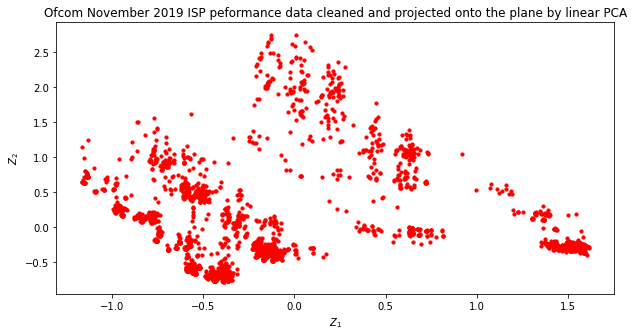

In [46]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (10,5))

X2D=pd.DataFrame(X2D)
plt.scatter(X2D.loc[:,0],X2D.loc[:,1], c ='r', marker = 'o', s = 10)
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.title("Ofcom November 2019 ISP peformance data cleaned and projected onto the plane by linear PCA" )

Text(0.5, 1.0, 'Ofcom November 2019 ISP peformance data cleaned and projected onto the plane by UMAP')

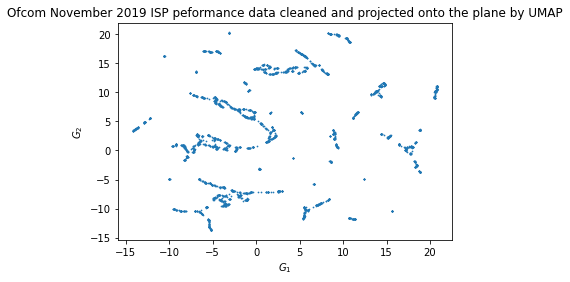

In [47]:

import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X2D)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],s=0.5)
plt.xlabel('$G_1$')
plt.ylabel('$G_2$')
plt.title("Ofcom November 2019 ISP peformance data cleaned and projected onto the plane by UMAP" )

In [33]:
clusterFeatures = ['Download - peak (ave)',
'Download - peak min(ave)', 'Download - peak max (ave)', 'Upload - peak (ave)',
'Upload - peak min(ave)', 'Upload - peak max (ave)', 'DNS Rate - peak', 'Jitter-upstream - peak',
'Jitter-downtream - peak', 'Latency - peak', 'Web loading - peak','Disconnections',  'YouTubeStartupDelayPeak',
 'NetflixStartupDelayPeak', 'iPlayerStartupDelayPeak','ISP', 'Technology', 'Distance from exchange - DSL only', 'MarketClass',
'Region', 'Country', 'Geography','DNS Failure peak', 'Packet Loss - peak',
'YouTubeUHDPeak', 'YouTubeHDPeak', 'YouTubeSDPeak', 'YouTubeFailedPeak',
'NetflixUHDPeak', 'NetflixHDPeak', 'NetflixSDPeak', 'NetflixFailedPeak',
'iPlayerUHDPeak', 'iPlayerHDPeak', 'iPlayerSDPeak','iPlayerFailedPeak'] 
dropFeatures=set(scaledDf)-set(clusterFeatures)        
#print (dropFeatures)
shrunkDf= clusterDf
shrunkDf.drop(dropFeatures,axis=1,inplace=True)
print(shrunkDf.columns)
#df.columns.to_series().groupby(df.dtypes).groups

Index(['ISP_A&A', 'ISP_BT', 'ISP_EE', 'ISP_Gigaclear', 'ISP_Hyperoptic',
       'ISP_KCOM', 'ISP_Origin Broadband', 'ISP_Plusnet', 'ISP_Post Office',
       'ISP_Sky',
       ...
       'NetflixUHDPeak', 'NetflixHDPeak', 'NetflixSDPeak', 'NetflixFailedPeak',
       'NetflixStartupDelayPeak', 'iPlayerUHDPeak', 'iPlayerHDPeak',
       'iPlayerSDPeak', 'iPlayerFailedPeak', 'iPlayerStartupDelayPeak'],
      dtype='object', length=123)


In [34]:
#df.columns.to_series().groupby(df.dtypes).groups
pca = PCA(n_components=35)
X35D = pca.fit_transform(shrunkDf)


#print(pca.components_.T[:,0])
xplainvar=np.cumsum(pca.explained_variance_ratio_)[-1]
print(xplainvar)

0.9503285651518417


In [35]:
#print(numerical_modDf.info())

NameError: name 'corr' is not defined

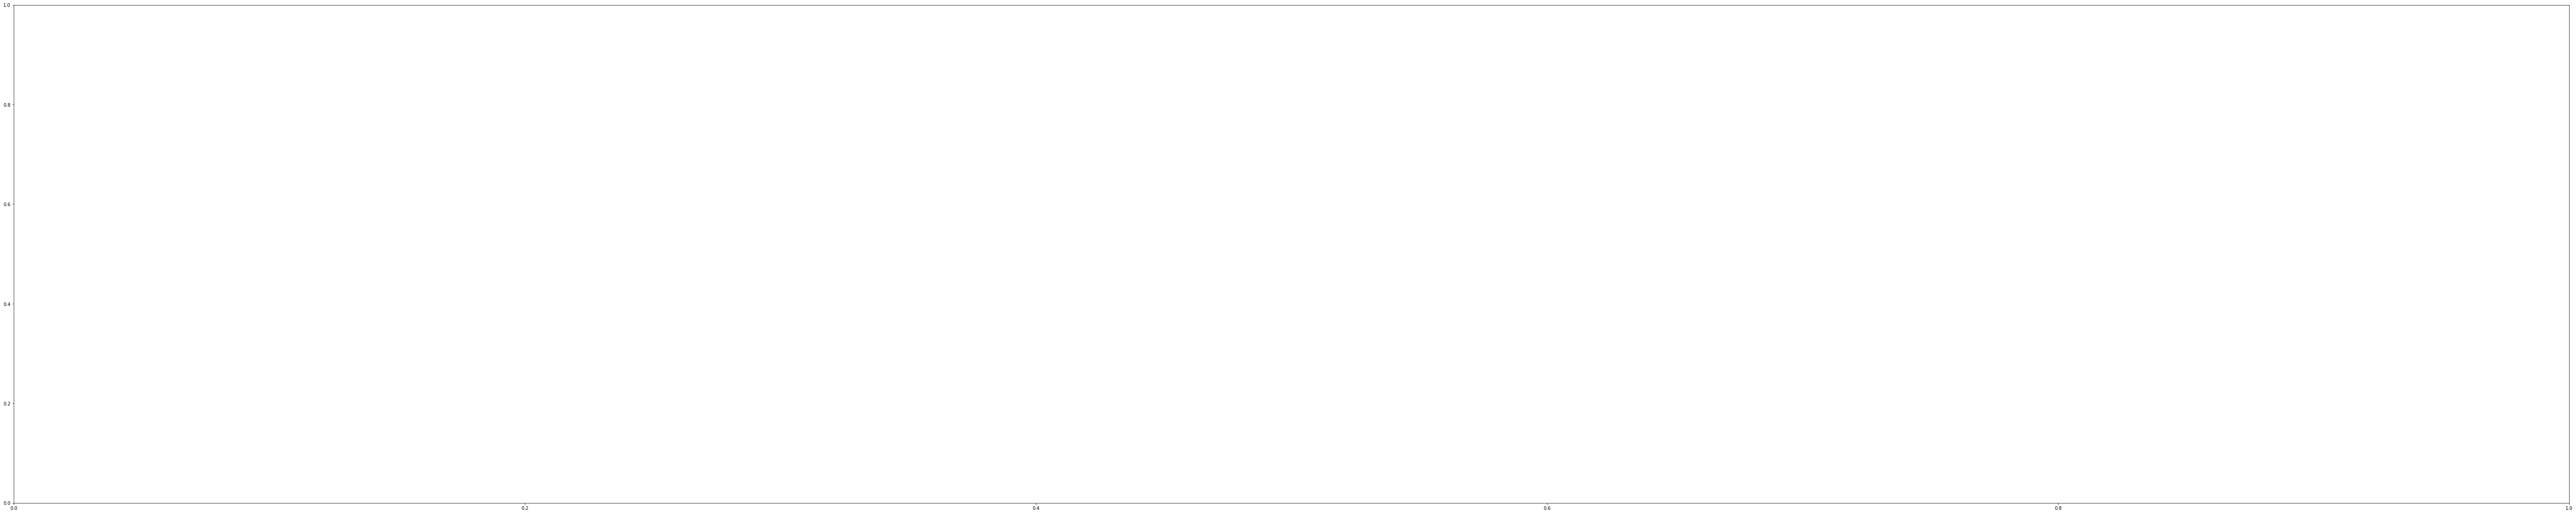

In [36]:


test=pd.concat([cat_modDf,imputedDf])
#test.YouTubeFailed24hr.mean()
#xvariables=['DNS Failure 24hr', 'DNS Failure peak', 'Packet Loss - 24h',
#         'Packet Loss - peak', 'YouTubeUHD24hr', 'YouTubeHD24hr',
#         'YouTubeSD24hr', 'YouTubeFailed24hr', 'YouTubeUHDPeak', 'YouTubeHDPeak',
#         'YouTubeSDPeak', 'YouTubeFailedPeak', 'NetflixUHD24hr', 'NetflixHD24hr',
#         'NetflixSD24hr', 'NetflixFailed24hr', 'NetflixUHDPeak', 'NetflixHDPeak',
#         'NetflixSDPeak', 'NetflixFailedPeak', 'iPlayerUHD24hr', 'iPlayerHD24hr',
#         'iPlayerSD24hr', 'iPlayerFailed24hr', 'iPlayerUHDPeak', 'iPlayerHDPeak',
#         'iPlayerSDPeak', 'iPlayerFailedPeak']
plt.subplots(figsize=(100,20))
sns.heatmap(corr, vmin=-1,annot= True,annot_kws={"size": 7},fmt='.2f',
   cmap=sns.diverging_palette(20, 220, n=200),
   square=True)

In [37]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
Xreduced = rbf_pca.fit_transform(X35D)


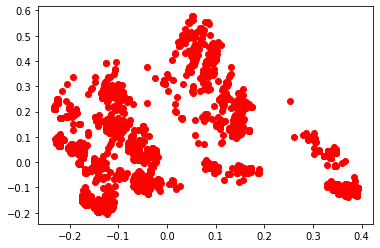

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xreduced[:,0],Xreduced[:,1], c ='r', marker = 'o')

In [39]:
linear_pca = KernelPCA(n_components=2, kernel="linear", gamma=0.04)
Xlinreduced = linear_pca.fit_transform(X35D)

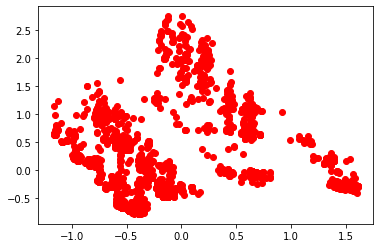

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xlinreduced[:,0],Xlinreduced[:,1], c ='r', marker = 'o')

In [41]:
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.04)
Xsigreduced = sig_pca.fit_transform(X35D)

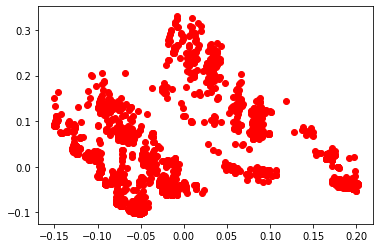

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xsigreduced[:,0],Xsigreduced[:,1], c ='r', marker = 'o')

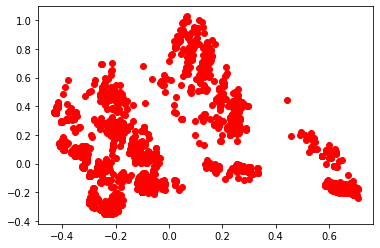

In [43]:
poly_pca = KernelPCA(n_components=2, kernel="poly", gamma=0.04)
Xpolyreduced = poly_pca.fit_transform(shrunkDf)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Xpolyreduced[:,0],Xpolyreduced[:,1], c ='r', marker = 'o')

Text(0.5, 1.0, 'Ofcom November 2019 data projected onto the plane using a cosine kernel for Kernel PCA')

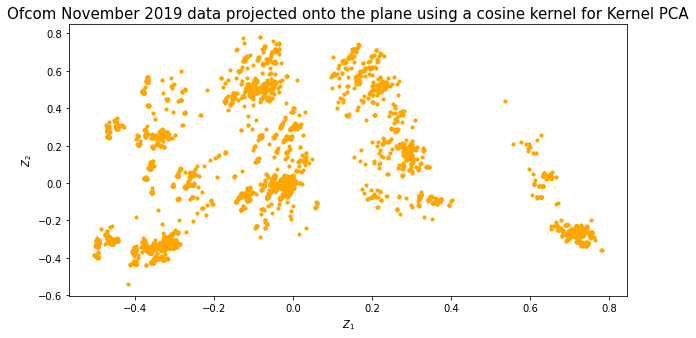

In [49]:
cosine_pca = KernelPCA(n_components=2, kernel="cosine", gamma=0.04)
Xcosinereduced = cosine_pca.fit_transform(X35D)
#Xcosinereduced2 = rbf_pca.fit_transform(shrunkDf)
fig, axs = plt.subplots()
fig.set_size_inches(10, 5)
plt.scatter(Xcosinereduced[:,0],Xcosinereduced[:,1], c ='orange', marker = 'o', s=10)

plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")

plt.title("Ofcom November 2019 data cleaned and projected onto the plane using a cosine kernel for Kernel PCA", fontsize=15)

[Text(0, 0.5, '$Z_2$')]

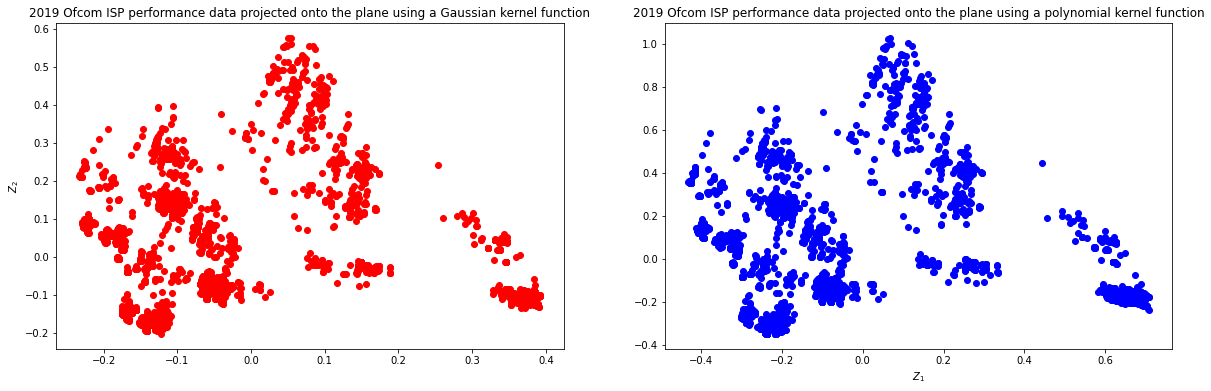

In [50]:

fig, axs  = plt.subplots(1,2, figsize=(20,6))



axs[0].scatter(Xreduced[:,0],Xreduced[:,1], c ='r', marker = 'o')
axs[0].set_title("2019 Ofcom ISP performance data projected onto the plane using a Gaussian kernel function")

axs[1].scatter(Xpolyreduced[:,0], Xpolyreduced[:,1],c= 'b', marker = 'o')
axs[1].set_title("2019 Ofcom ISP performance data projected onto the plane using a polynomial kernel function")


#axs[1,1].scatter(Xcosinereduced[:,0],Xcosinereduced[:,1], c ='orange', marker = 'o')
#axs[1,1].set_title("Projection of the cosine kernel function onto the plane")

plt.setp(axs[-1], xlabel='$Z_1$')
plt.setp(axs[0], ylabel='$Z_2$')

Text(0, 0.5, '$Z_2$')

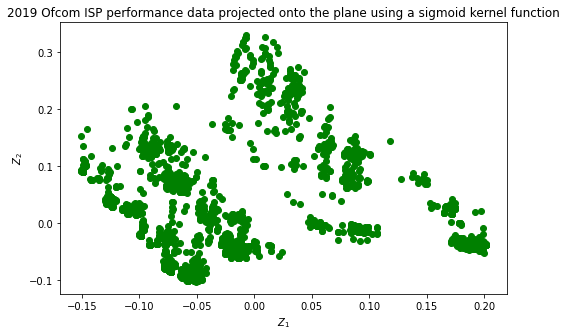

In [51]:
fig, axs  = plt.subplots(figsize=(8, 5))
axs.scatter(Xsigreduced[:,0], Xsigreduced[:,1], c= 'g', marker = 'o')
axs.set_title("2019 Ofcom ISP performance data projected onto the plane using a sigmoid kernel function")
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

In [41]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X35D)
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(embedding[:,0],embedding[:,1], c ='r', marker = 'o')

NameError: name 'umap' is not defined

In [55]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples = 10 )
dbscan.fit(Xcosinereduced)


DBSCAN(eps=0.05, min_samples=10)

Estimated number of clusters: 16
Estimated number of noise points: 51


Text(0.5, 1.0, 'DBSCAN')

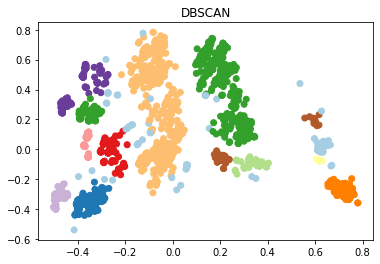

In [56]:
from sklearn import metrics

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

y_preddbscan = dbscan.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_preddbscan, cmap='Paired')
plt.title("DBSCAN")

In [57]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=7,n_init=20)
gm.fit(Xcosinereduced)
print(gm.weights_)
print(gm.means_)
print(gm.converged_)
print(gm.n_iter_)

[0.14586174 0.14184068 0.24602919 0.1318719  0.03137478 0.14455474
 0.15846697]
[[-0.33975051  0.18514222]
 [ 0.72076191 -0.27551127]
 [-0.39222247 -0.34795107]
 [-0.06830465  0.43901664]
 [ 0.63079912  0.03181552]
 [-0.04158538 -0.03251748]
 [ 0.24641772  0.27442976]]
True
24


Text(0.5, 1.0, 'Gaussian mixtures')

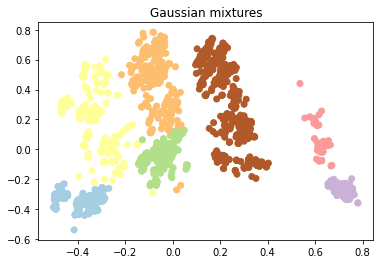

In [58]:
y_predgaussian = gm.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_predgaussian, cmap='Paired')
plt.title("Gaussian mixtures")

Text(0.5, 1.0, 'Kmeans')

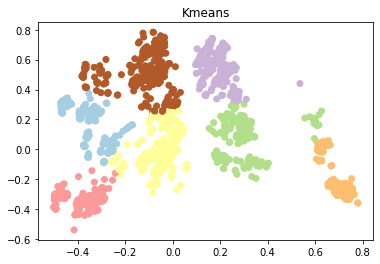

In [59]:
from sklearn.cluster import KMeans
#from sklearn.cluster import Kmeans
kmeans = KMeans(n_clusters=7, n_init=20)
y_predKmeans = kmeans.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_predKmeans, cmap='Paired')
plt.title("Kmeans")

Text(0.5, 1.0, 'Spectral Clustering')

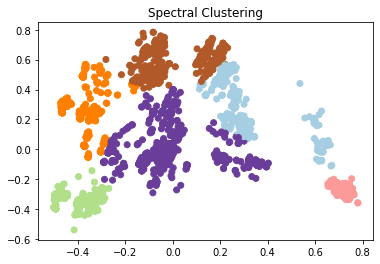

In [60]:
from sklearn.cluster import SpectralClustering
spectral=SpectralClustering(n_clusters=6, n_init=20)
y_predspectral= spectral.fit_predict(Xcosinereduced)
plt.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_predspectral, cmap='Paired')
plt.title("Spectral Clustering")

[Text(0, 0.5, '$Z_2$'), Text(0, 0.5, '$Z_2$')]

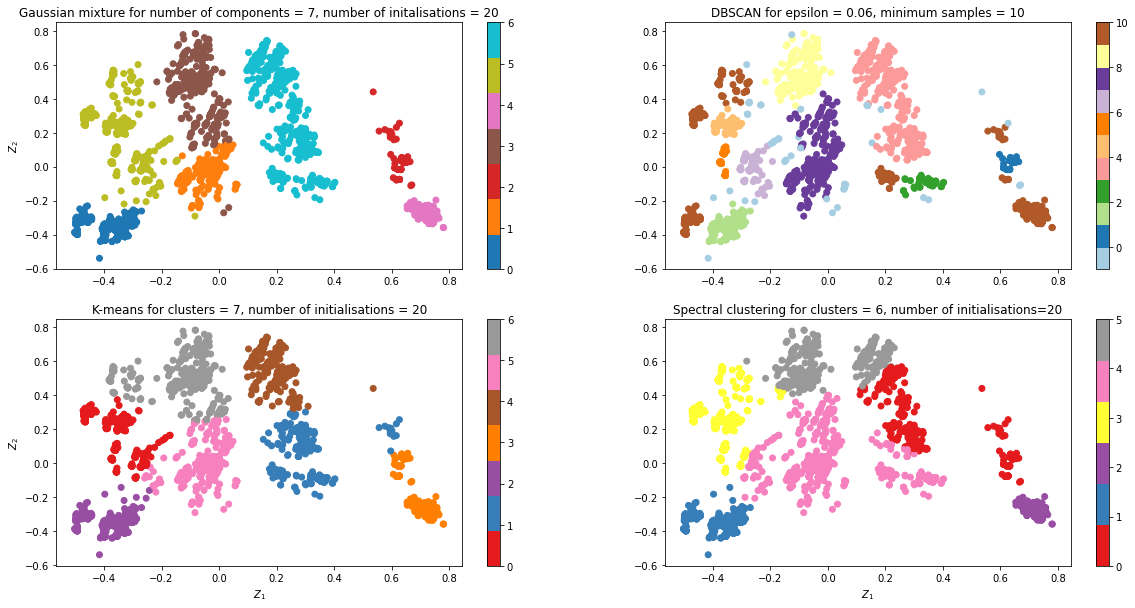

In [61]:
fig, axs  = plt.subplots(2,2, figsize=(20,10))

#fig.suptitle('Different kernel performance for Kernel PCA')

axplot1 = axs[0,0].scatter(Xcosinereduced[:,0],Xcosinereduced[:,1],c=y_predgaussian, cmap=plt.cm.get_cmap('tab10', 7))
axs[0,0].set_title("Gaussian mixture for number of components = 7, number of initalisations = 20")
plt.colorbar(axplot1,ax=axs[0,0])
axplot2 = axs[0,1].scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_preddbscan,cmap=plt.cm.get_cmap('Paired',11),vmin=-1, vmax=10)
axs[0,1].set_title("DBSCAN for epsilon = 0.06, minimum samples = 10")
plt.colorbar(axplot2,ax=axs[0,1])
axplot3 = axs[1,0].scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_predKmeans, cmap=plt.cm.get_cmap('Set1',7))
plt.colorbar(axplot3,ax=axs[1,0])
axs[1,0].set_title("K-means for clusters = 7, number of initialisations = 20")

axplot4 = axs[1,1].scatter(Xcosinereduced[:,0],Xcosinereduced[:,1], c=y_predspectral, cmap=plt.cm.get_cmap('Set1',6))
axs[1,1].set_title("Spectral clustering for clusters = 6, number of initialisations=20")
plt.colorbar(axplot4, ax=axs[1,1])

# axplot5 = axs[2,1].scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred2, cmap=plt.cm.get_cmap('Dark2', 7), vmax=5)
# plt.colorbar(axplot2,ax=axs[1])
# axs[1].set_title("HDBSCAN for minimum cluster size=150, minimum samples = 1, epsilon=0.05")

plt.setp(axs[-1, :], xlabel='$Z_1$')
plt.setp(axs[:, 0], ylabel='$Z_2$')


In [62]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=230, min_samples = 1,cluster_selection_epsilon=0.05)
y_pred = clusterer.fit_predict(Xcosinereduced)



clusterer2 = hdbscan.HDBSCAN(min_cluster_size=100, min_samples = 1, cluster_selection_epsilon=0.05)
y_pred2 = clusterer2.fit_predict(Xcosinereduced)
print(y_pred2)

[0 5 1 ... 4 4 2]


[Text(0, 0.5, '$Z_2$'), Text(0, 0.5, '$Z_2$')]

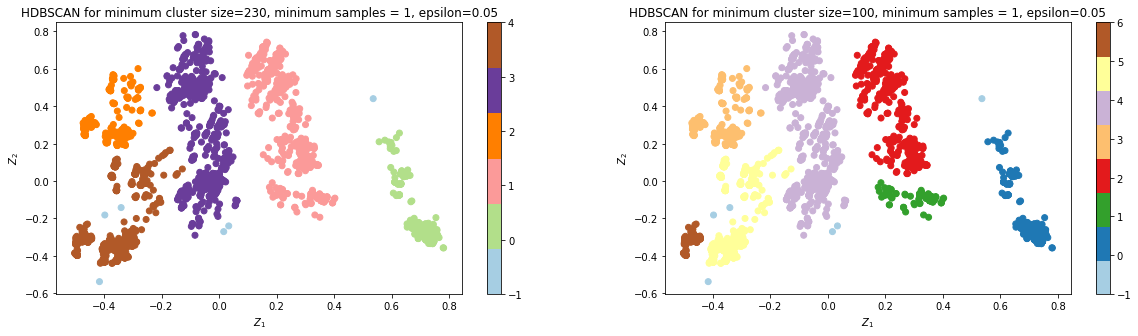

In [63]:


fig, axs = plt.subplots(1,2)
fig.set_size_inches(20, 5)
#cax = ax.imshow(data, interpolation='nearest', cmap="Dark2")

axplot1 = axs[0].scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred, cmap=plt.cm.get_cmap('Paired', 6),vmax=4)
plt.colorbar(axplot1,ax=axs[0])
axs[0].set_title("HDBSCAN for minimum cluster size=230, minimum samples = 1, epsilon=0.05")
axplot2 = axs[1].scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred2, cmap=plt.cm.get_cmap('Paired', 8), vmax=6)
plt.colorbar(axplot2,ax=axs[1])
axs[1].set_title("HDBSCAN for minimum cluster size=100, minimum samples = 1, epsilon=0.05")

plt.setp(axs[:], xlabel='$Z_1$')
plt.setp(axs[:], ylabel='$Z_2$')


In [51]:
import collections
counter=collections.Counter(clusterer2.labels_)
print(counter)

Counter({4: 843, 5: 704, 0: 528, 2: 372, 6: 247, 3: 242, 1: 112, -1: 6})


<AxesSubplot:ylabel='$\\lambda$ value'>

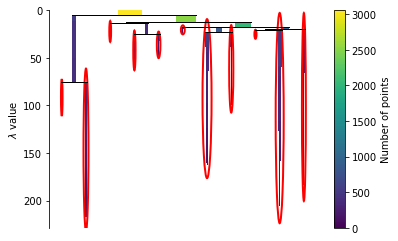

In [829]:

clusterer2.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))
#clusterer2.condensed_tree_.plot()

<AxesSubplot:ylabel='$\\lambda$ value'>

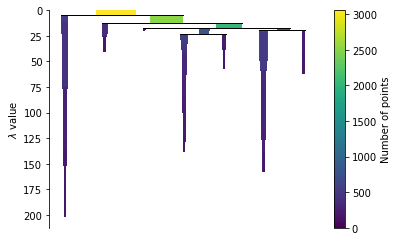

Estimated number of clusters: 4
Estimated number of noise points: 524


Text(0.5, 1.0, 'DBSCAN')

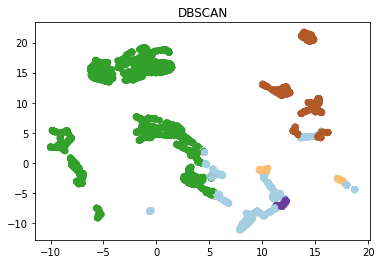

In [316]:
dbscan = DBSCAN(eps=0.10, min_samples = 25)
dbscan.fit(X3D)

# Number of clusters in labels, ignoring noise if present.
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

y_pred = dbscan.fit_predict(X3D)
plt.scatter(embedding[:,0], embedding[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")



Text(0.5, 1.0, 'HDBSCAN')

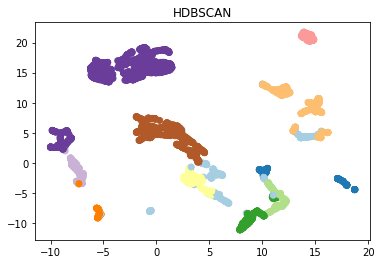

In [339]:
umap_clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples = 1,cluster_selection_epsilon=0.04)
umap_y_pred = umap_clusterer.fit_predict(X3D)
plt.scatter(embedding[:,0], embedding[:,1],c=umap_y_pred, cmap='Paired')
plt.title("HDBSCAN")



In [172]:
umapLabelFeature= pd.Series(umap_clusterer.labels_).rename("Umap_cluster_labels")
umapLabelledDf=pd.concat([modDf2.reset_index(drop=True),umapLabelFeature.reset_index(drop=True)],axis=1)


In [211]:
umapLabelledDf.loc[umapLabelledDf['Umap_cluster_labels']== 5, ["ISP","Technology"]]

,ISP,Technology
1,Plusnet,FTTC
12,Vodafone,FTTC
26,Plusnet,FTTC
39,TalkTalk,FTTC
49,Plusnet,FTTC
51,Vodafone,FTTC
56,Plusnet,FTTC
75,Plusnet,FTTC
78,TalkTalk,FTTC
85,Plusnet,FTTC


In [64]:
#labelFeature= pd.Series(clusterer.labels_).rename("Cluster_labels")
labelFeature2= pd.Series(clusterer2.labels_).rename("Cluster_labels")
print(clusterer2.labels_)
#Xcosinereduced = pd.concat([pd.DataFrame(Xcosinereduced).reset_index(drop=True),labelFeature.reset_index(drop=True)],axis=1)

#labelledDf=pd.concat([modDf2.reset_index(drop=True),labelFeature.reset_index(drop=True)],axis=1)
labelledDf=pd.concat([modDf2.reset_index(drop=True),labelFeature2.reset_index(drop=True)],axis=1)
#print(labelledDf2.iloc[0:100,:])

[0 5 1 ... 4 4 2]


In [65]:
pd.get_option("display.max_rows")
pd.get_option("display.max_columns")

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows",3100)
pd.set_option('display.width', None)

In [66]:

#Cluster 0 all virgin cable customers
cluster0_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 0, ['ISP','Technology']].values
unique, counts = np.unique(cluster0_techlist, return_counts=True)
dict(zip(unique, counts))
labelledDf.loc[labelledDf['Cluster_labels']== 0]['Download - peak (ave)'].mean()
cluster0_geographylist= labelledDf.loc[labelledDf['Cluster_labels']== 0, ['Latency - peak']].mean()
print(cluster0_geographylist)


Latency - peak    18.51053
dtype: float64


In [67]:
# cluster 1 is  FTTP 
cluster1_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 1, ['ISP','Technology']].values
unique, counts = np.unique(cluster1_techlist, return_counts=True)
dict(zip(unique, counts))

#labelledDf.loc[labelledDf['Cluster_labels']== 1]['Download - peak (ave)'].mean()
#cluster1_geographylist= labelledDf.loc[labelledDf['Cluster_labels']== 1, ['Latency - peak']].mean()
#print(cluster1_geographylist)

{'BT': 27,
 'FTTP': 112,
 'Gigaclear': 1,
 'Hyperoptic': 6,
 'KCOM': 73,
 'Plusnet': 3,
 'TalkTalk': 2}

In [68]:
#cluster 2 is exclusively FTTC customers from a range of ISPs including Sky
cluster2_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 2, ['Technology']].values
unique, counts = np.unique(cluster2_techlist, return_counts=True)
dict(zip(unique, counts))
#cluster2_techspeedlist= labelledDf.loc[labelledDf['Cluster_labels']== 2,['Technology', 'Download - peak (ave)','Latency - peak']]

#cluster2_techspeedlist.loc[cluster2_techspeedlist['Technology'] == 'FTTP']['Latency - peak'].mean()
cluster2_geographylist= labelledDf.loc[labelledDf['Cluster_labels']== 2, ['Latency - peak']].mean()
print(cluster2_geographylist)

Latency - peak    25.850914
dtype: float64


In [69]:
# cluster 3 all FTTC from a range of ISPs and a couple of FTTPs from sky
cluster3_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 3, ['ISP','Technology']].values
unique, counts = np.unique(cluster3_techlist, return_counts=True)
dict(zip(unique, counts))

cluster3_infolist= labelledDf.loc[labelledDf['Cluster_labels']== 3, ['Geography','Region','Country']].values
unique, counts = np.unique(cluster3_infolist, return_counts=True)
dict(zip(unique, counts))

cluster3_latencylist= labelledDf.loc[labelledDf['Cluster_labels']== 3, ['PACKAGE (download by upload)']].values
print(cluster3_latencylist)


[[76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76

In [82]:
#Cluster 4 are all FTTC points including Sky
cluster4_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 4, ['Technology']].values
unique, counts = np.unique(cluster4_techlist, return_counts=True)
dict(zip(unique, counts))

cluster4_infolist= labelledDf.loc[labelledDf['Cluster_labels']== 4, ['Geography','Region','Country']].values
unique, counts = np.unique(cluster4_infolist, return_counts=True)
dict(zip(unique, counts))
# labelledDf.loc[labelledDf['Cluster_labels']== 4,['Download - peak (ave)']].mean()
# cluster4_geographylist= labelledDf.loc[(labelledDf['Cluster_labels']== 4) & (labelledDf['Technology'] == 'FTTC'), ['PACKAGE (download by upload)']].values
# unique, counts = np.unique(cluster4_geographylist, return_counts=True)
# dict(zip(unique, counts))



{'East': 90,
 'East Midlands': 49,
 'England': 643,
 'London': 34,
 'North East': 32,
 'North West': 87,
 'Northern Ireland': 62,
 'Rural': 276,
 'Scotland': 198,
 'South East': 143,
 'South West': 93,
 'Urban': 567,
 'Wales': 140,
 'West Midlands': 45,
 'Yorkshire & Humberside': 70}

In [71]:
#Cluster 5 is exclusively BT FTTC datapoints
cluster5_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 5, ['ISP','Technology']].values
unique, counts = np.unique(cluster5_techlist, return_counts=True)
dict(zip(unique, counts))

cluster5_infolist= labelledDf.loc[labelledDf['Cluster_labels']== 5, ['Geography','Region','Country']].values
unique, counts = np.unique(cluster5_infolist, return_counts=True)
dict(zip(unique, counts))
# labelledDf.loc[labelledDf['Cluster_labels']== 5]['Download - peak (ave)'].mean()

cluster5_geographylist= labelledDf.loc[labelledDf['Cluster_labels']== 5, ['PACKAGE (download by upload)']].values
print(cluster5_geographylist)


[[76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76

In [72]:
#Cluster 6 is exclusively BT FTTC datapoints
cluster6_techlist= labelledDf.loc[labelledDf['Cluster_labels']== 6, ['ISP','Technology']].values
unique, counts = np.unique(cluster6_techlist, return_counts=True)
dict(zip(unique, counts))

cluster6_infolist= labelledDf.loc[labelledDf['Cluster_labels']== 6, ['Geography','Region','Country']].values
unique, counts = np.unique(cluster6_infolist, return_counts=True)
dict(zip(unique, counts))

cluster6_geographylist= labelledDf.loc[labelledDf['Cluster_labels']== 6, ['PACKAGE (download by upload)']].values
print(cluster6_geographylist)

[[76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76]
 [76

Text(0, 0.5, '$Z_2$')

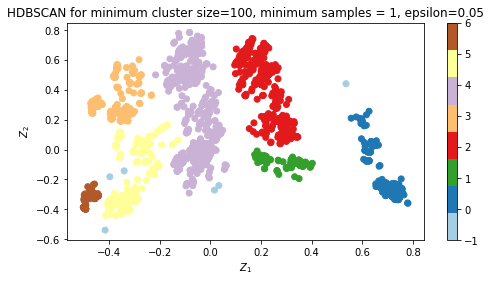

In [73]:
fig, axs = plt.subplots()
fig.set_size_inches(8, 4)
#cax = ax.imshow(data, interpolation='nearest', cmap="Dark2")


axplot = axs.scatter(Xcosinereduced[:,0], Xcosinereduced[:,1],c=y_pred2, cmap=plt.cm.get_cmap('Paired', 8), vmax=6)
plt.colorbar(axplot,ax=axs)
axs.set_title("HDBSCAN for minimum cluster size=100, minimum samples = 1, epsilon=0.05")

plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')


In [74]:
pairplotFeatures= [ 'ISP', 'Technology', 'PACKAGE (download by upload)',
       'Distance from exchange - DSL only', 'Region', 'Country', 'Geography',
       'Download - peak (ave)',
        'Upload - peak (ave)', 
       'DNS Failure peak', 'DNS Rate - peak',
       'Latency - peak', 'Packet Loss - peak', 'Web loading - peak', 'Disconnections', 'Jitter-upstream - peak',
       'Jitter-downtream - peak',
        'YouTubeUHDPeak', 'YouTubeHDPeak',
       'YouTubeSDPeak', 'YouTubeFailedPeak', 'YouTubeStartupDelayPeak',
        'NetflixUHDPeak', 'NetflixHDPeak',
       'NetflixSDPeak', 'NetflixFailedPeak', 'NetflixStartupDelayPeak',
          'iPlayerUHDPeak', 'iPlayerHDPeak',
       'iPlayerSDPeak', 'iPlayerFailedPeak', 'iPlayerStartupDelayPeak', 'Cluster_labels']
dropFeatures=set(modDf2)-set(pairplotFeatures)        
analysisDf= labelledDf
analysisDf.drop(dropFeatures,axis=1,inplace=True)


In [78]:
#print(shrunkDf.columns[40:])

C:\Anaconda\envs\test\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\envs\test\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


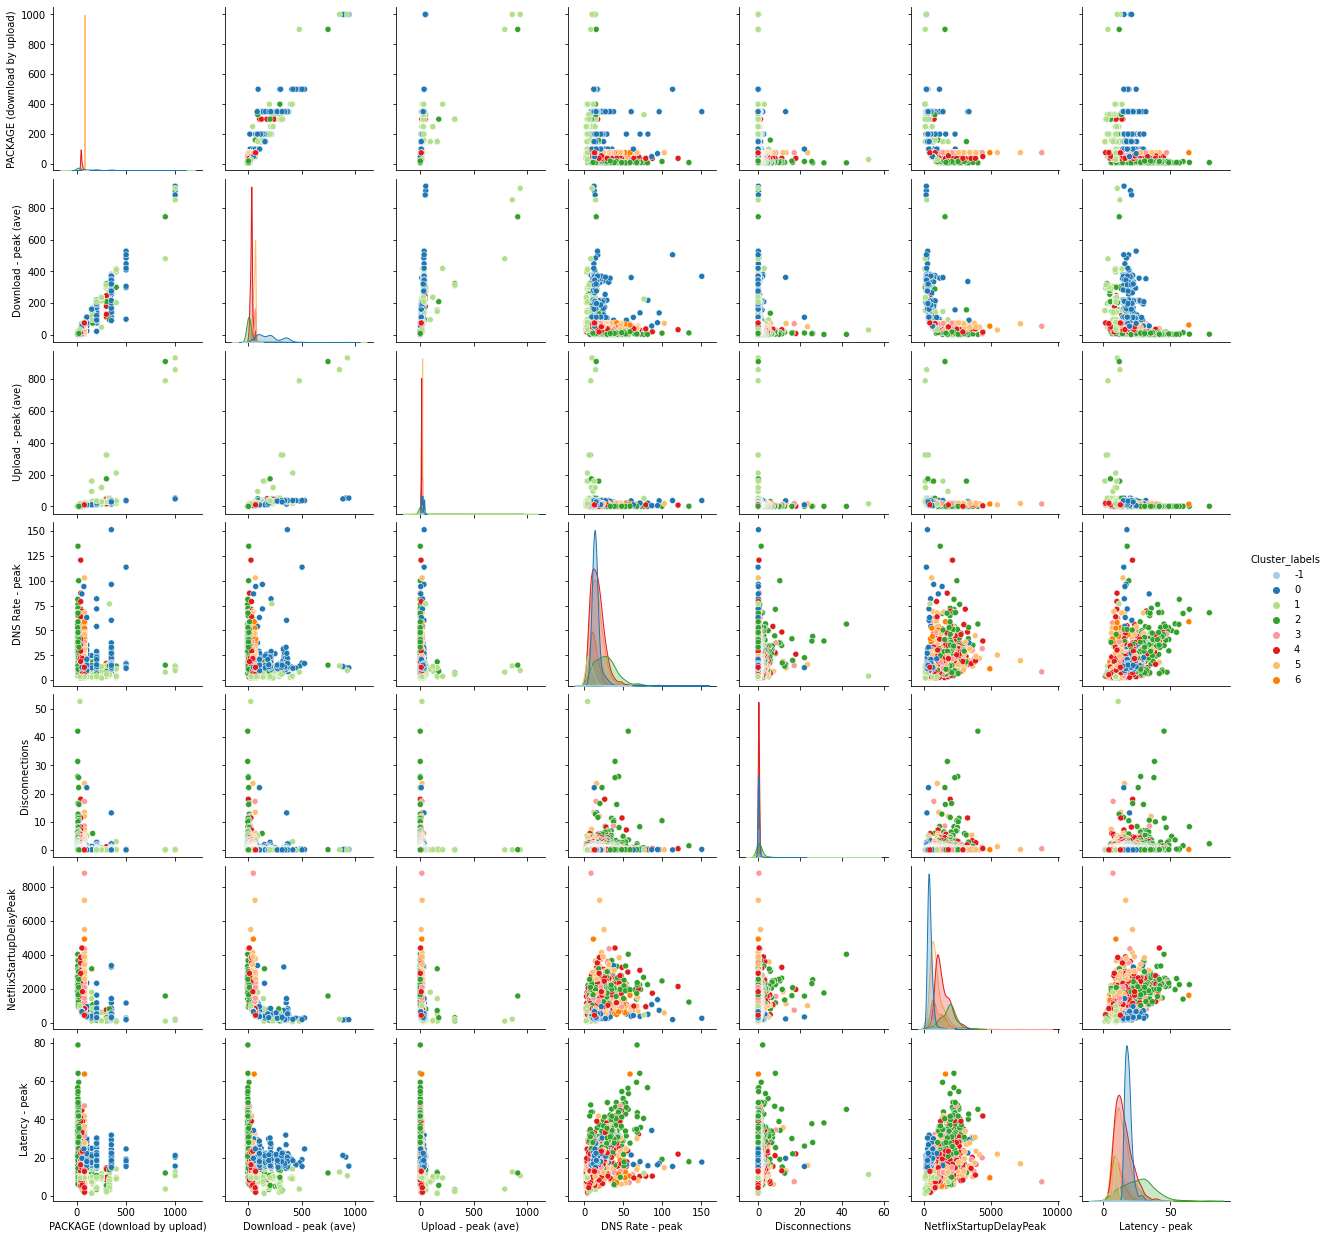

In [61]:

sns.pairplot(data = analysisDf[[ 'ISP', 'Technology', 'PACKAGE (download by upload)',
       'Distance from exchange - DSL only', 'Region', 'Country', 'Geography',
       'Download - peak (ave)',
        'Upload - peak (ave)', 
       'DNS Failure peak', 'DNS Rate - peak', 'Disconnections',
        'NetflixUHDPeak', 'NetflixHDPeak',
      'NetflixFailedPeak', 'NetflixStartupDelayPeak',
       'Latency - peak','Cluster_labels' ]], hue='Cluster_labels', palette= 'Paired',diag_kind = 'kde', dropna= True)

In [76]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows",3100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

mean_labels= labelledDf.groupby(['Cluster_labels','Technology']).mean()
mean_labels.iloc[:,0:5]


PACKAGE (download by upload)  \
Cluster_labels Technology                                 
-1             Cable                         100.000000   
               FTTC                           76.000000   
               FTTP                           76.000000   
 0             Cable                         212.708333   
 1             FTTP                          211.142857   
 2             ADSL1                           8.155556   
               ADSL2                          14.573379   
               FTTP                          200.058824   
 3             FTTC                           76.000000   
 4             FTTC                           42.619048   
               FTTP                           76.000000   
 5             FTTC                           75.784091   
 6             FTTC                           76.000000   

                           Download - peak (ave)  Upload - peak (ave)  \
Cluster_labels Technology                                               
-1             Cable                   79.740000             9.820000   
               FTTC                    28.086667             8.020000   
               FTTP                    65.820000            18.430000   
 0             Cable                  202.859754            20.397462   
 1             FTTP                   195.234286            58.030893   
 2             ADSL1                    2.729333             0.498889   
               ADSL2                    9.917167             0.781297   
               FTTP                   167.887941            80.330588   
 3             FTTC                    57.521116            15.203678   
 4             FTTC                    32.252418             7.290183   
               FTTP                    71.124583            19.510000   
 5             FTTC                    58.636690            16.284034   
 6             FTTC                    57.303401            15.412267   

                           DNS Rate - peak  Jitter-upstream - peak  
Cluster_labels Technology                                           
-1             Cable             12.330000                2.530000  
               FTTC              19.626667                0.343333  
               FTTP              15.610000                0.460000  
 0             Cable             15.602140                2.387784  
 1             FTTP               7.018929                0.337321  
 2             ADSL1             37.769556                2.270000  
               ADSL2             27.902389                1.646370  
               FTTP              10.886471                0.340000  
 3             FTTC              15.995826                0.352149  
 4             FTTC              17.149683                0.613077  
               FTTP               9.435417                0.280417  
 5             FTTC              16.235284                0.490696  
 6             FTTC              13.994980                0.403320

render_mpl_table(mean_labels)

In [ ]:
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

table(ax, mean_labels)  # where df is your data frame

plt.savefig('mytable2.png')

In [81]:
import dataframe_image as dfi
mean_labels.iloc[:,6:].dfi.export('mytable2.png')